<a href="https://colab.research.google.com/github/Melvinmcrn/DataScience/blob/master/Final/Part2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

# Q1

In [148]:
data = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv ')
data.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,e,s,s,p,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,c,s,s,p,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,c,s,s,p,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,e,s,s,p,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,e,s,s,p,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [0]:
data = data.set_index('id', drop=True)

In [150]:
data['label'].isnull().sum()

60

In [151]:
data.shape

(5824, 23)

In [152]:
data = data.dropna(axis=0, subset=['label'])
data.shape

(5764, 23)

In [153]:
for c in data.columns:
  if c.find('veil') == 0:
    data = data.drop(c, axis=1)

data.shape

(5764, 21)

In [154]:
data.head(5)

,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
id,,,,,,,,,,,,,,,,,,,,,
1,p,x,s,t,p,f,c,n,e,e,s,s,o,p,k,s,u,1.0,3.0,1.0,1.0
2,e,x,s,t,a,f,c,b,e,c,s,s,o,p,n,n,g,2.0,3.0,1.0,1.0
3,e,b,s,t,l,f,c,b,e,c,s,s,o,p,n,n,m,3.0,1.0,1.0,1.0
4,p,x,y,t,p,f,c,n,e,e,s,s,o,p,k,s,u,3.0,1.0,1.0,1.0
5,e,x,s,f,n,f,w,b,t,e,s,s,o,e,n,a,g,4.0,3.0,1.0,1.0


In [155]:
data.describe()

,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
count,5737.000000,5643.000000,5733.000000,5702.000000
mean,3.327523,5.910686,2.316239,3.638022
std,1.859218,2.813630,1.670297,2.375062
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000
50%,4.000000,6.000000,2.000000,5.000000
75%,5.000000,9.000000,3.000000,5.000000
max,10.000000,12.000000,9.000000,9.000000


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 1 to 5824
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   label                        5764 non-null   object 
 1   cap-shape                    5764 non-null   object 
 2   cap-surface                  5737 non-null   object 
 3   bruises                      5665 non-null   object 
 4   odor                         5665 non-null   object 
 5   gill-attachment              5665 non-null   object 
 6   gill-spacing                 5634 non-null   object 
 7   gill-size                    5643 non-null   object 
 8   stalk-shape                  5643 non-null   object 
 9   stalk-root                   5733 non-null   object 
 10  stalk-surface-above-ring     5733 non-null   object 
 11  stalk-surface-below-ring     5733 non-null   object 
 12  ring-number                  5702 non-null   object 
 13  ring-type         

# Q2

In [157]:
data.head(1)

,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
id,,,,,,,,,,,,,,,,,,,,,
1,p,x,s,t,p,f,c,n,e,e,s,s,o,p,k,s,u,1.0,3.0,1.0,1.0


In [158]:
mapping_dictionary = {"label":{ "p": 1, "e": 0}}
data = data.replace(mapping_dictionary)
data['label'].value_counts()

1    3660
0    2104
Name: label, dtype: int64

In [159]:
obj_col = []
num_col = []
for c in data.columns:
  if data[c].dtypes == object:
    obj_col.append(c)
  else:
    num_col.append(c)
obj_col

['cap-shape',
 'cap-surface',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [160]:
dummy = pd.get_dummies(data[obj_col], drop_first=True)
data = pd.concat([data, dummy], axis=1)
data = data.drop(obj_col, axis=1)
data.columns

Index(['label', 'cap-color-rate', 'gill-color-rate',
       'stalk-color-above-ring-rate', 'stalk-color-below-ring-rate',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_x',
       'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'bruises_t',
       'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-attachment_f', 'gill-spacing_w', 'gill-size_n',
       'stalk-shape_t', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'ring-number_o', 'ring-number_t', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_w', 'spore-print-color_y',
       'population_c', 'population_n

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size=0.3, stratify=data['label'], random_state=2023)

In [163]:
print("Whole data= 0:1 = ",data['label'].value_counts()[0],":",data['label'].value_counts()[1])
print("Train data= 0:1 = ",y_train.value_counts()[0],":",y_train.value_counts()[1])
print("Test data= 0:1 = ",y_test.value_counts()[0],":",y_test.value_counts()[1])

Whole data= 0:1 =  2104 : 3660
Train data= 0:1 =  1473 : 2561
Test data= 0:1 =  631 : 1099


# Q3

In [164]:
num_col.remove('label')
X_train[num_col].isnull().sum()

cap-color-rate                 20
gill-color-rate                90
stalk-color-above-ring-rate    23
stalk-color-below-ring-rate    48
dtype: int64

In [165]:
mean_data = X_train[num_col].mean()
mean_data

cap-color-rate                 3.323866
gill-color-rate                5.936105
stalk-color-above-ring-rate    2.306407
stalk-color-below-ring-rate    3.647516
dtype: float64

In [166]:
mode_data = X_train[list(set(X_train.columns) - set(num_col))].mode()
mode_data

,ring-type_n,stalk-surface-above-ring_k,stalk-surface-below-ring_s,gill-attachment_f,ring-number_t,spore-print-color_y,odor_p,stalk-surface-above-ring_y,cap-shape_k,population_n,spore-print-color_k,stalk-root_b,cap-surface_g,cap-shape_x,odor_c,stalk-root_e,spore-print-color_w,odor_y,habitat_l,odor_l,gill-size_n,cap-surface_s,population_y,habitat_u,spore-print-color_r,cap-shape_c,stalk-root_c,odor_f,gill-spacing_w,stalk-shape_t,ring-type_f,habitat_p,bruises_t,spore-print-color_o,population_v,habitat_g,habitat_w,cap-shape_f,habitat_m,ring-type_p,stalk-surface-below-ring_y,population_s,spore-print-color_n,odor_m,odor_n,ring-number_o,spore-print-color_h,stalk-surface-above-ring_s,ring-type_l,odor_s,stalk-surface-below-ring_k,population_c,cap-surface_y
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [169]:
X_train_new = X_train.fillna(mean_data)
X_train_new = X_train_new.fillna(mode_data)
X_test_new = X_test.fillna(mean_data)
X_test_new = X_test_new.fillna(mode_data)
print(X_train_new.isnull().sum())
print(X_test_new.isnull().sum())

cap-color-rate                 0
gill-color-rate                0
stalk-color-above-ring-rate    0
stalk-color-below-ring-rate    0
cap-shape_c                    0
cap-shape_f                    0
cap-shape_k                    0
cap-shape_x                    0
cap-surface_g                  0
cap-surface_s                  0
cap-surface_y                  0
bruises_t                      0
odor_c                         0
odor_f                         0
odor_l                         0
odor_m                         0
odor_n                         0
odor_p                         0
odor_s                         0
odor_y                         0
gill-attachment_f              0
gill-spacing_w                 0
gill-size_n                    0
stalk-shape_t                  0
stalk-root_b                   0
stalk-root_c                   0
stalk-root_e                   0
stalk-surface-above-ring_k     0
stalk-surface-above-ring_s     0
stalk-surface-above-ring_y     0
stalk-surf

In [170]:
X_train_new.head(5)

,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2824,4.0,2.0,5.0,7.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4195,5.0,9.0,2.0,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1333,4.0,6.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1869,4.0,7.0,2.0,7.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4105,5.0,9.0,1.0,5.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [171]:
X_test_new.head(5)

,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5132,5.0,9.0,2.0,5.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2554,2.0,7.0,2.0,6.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1427,2.0,2.0,5.0,6.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4844,4.0,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2858,7.0,7.0,1.0,1.0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [172]:
X_train_new.describe()

,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.00000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000
mean,3.323866,5.936105,2.306407,3.647516,0.000496,0.417452,0.14700,0.401834,0.000992,0.298215,0.440258,0.319534,0.031730,0.363659,0.000496,0.006197,0.379028,0.000992,0.098166,0.100397,0.944968,0.076847,0.354239,0.565692,0.553049,0.008924,0.002727,0.413981,0.544869,0.003966,0.394646,0.542390,0.015865,0.882995,0.099157,0.008676,0.218642,0.005949,0.405801,0.277144,0.129400,0.133366,0.007933,0.012395,0.411254,0.007933,0.057015,0.025533,0.068171,0.606346,0.231284,0.156173,0.148488,0.006941,0.177491,0.027268,0.030987
std,1.864288,2.773806,1.655744,2.347124,0.022263,0.493200,0.35415,0.490330,0.031478,0.457531,0.496480,0.466354,0.175303,0.481112,0.022263,0.078488,0.485205,0.031478,0.297575,0.300565,0.228071,0.266381,0.478341,0.495727,0.497239,0.094057,0.052154,0.492606,0.498044,0.062861,0.488835,0.498262,0.124969,0.321467,0.298910,0.092753,0.413376,0.076912,0.491107,0.447644,0.335684,0.340012,0.088722,0.110653,0.492122,0.088722,0.231901,0.157757,0.252070,0.488620,0.421706,0.363064,0.355627,0.083033,0.382131,0.162884,0.173303
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,6.000000,2.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [173]:
X_test_new.describe()

,cap-color-rate,gill-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.0,1730.000000,1730.000000,1730.000000,1730.00000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.00000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,3.335993,5.853190,2.338989,3.616223,0.001156,0.403468,0.135838,0.420809,0.0,0.315607,0.413873,0.308092,0.03526,0.369942,0.000578,0.006358,0.375145,0.001734,0.100578,0.094798,0.951445,0.083237,0.351445,0.545087,0.548555,0.009827,0.005202,0.402890,0.560116,0.004624,0.408671,0.537572,0.016185,0.872832,0.112717,0.007514,0.231214,0.006358,0.397110,0.285549,0.116763,0.138728,0.009249,0.011561,0.416763,0.009249,0.061272,0.026590,0.071098,0.604046,0.22948,0.167052,0.134682,0.007514,0.191329,0.021387,0.038728
std,1.833187,2.807373,1.689273,2.397697,0.033991,0.490735,0.342716,0.493832,0.0,0.464892,0.492669,0.461838,0.18449,0.482928,0.024042,0.079509,0.484300,0.041618,0.300856,0.293020,0.214998,0.276320,0.477560,0.498107,0.497781,0.098669,0.071960,0.490621,0.496516,0.067864,0.491730,0.498730,0.126223,0.333257,0.316338,0.086385,0.421731,0.079509,0.489441,0.451806,0.321231,0.345763,0.095751,0.106928,0.493165,0.095751,0.239897,0.160927,0.257063,0.489196,0.42062,0.373130,0.341482,0.086385,0.393462,0.144713,0.193003
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.936105,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Q4

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image 
from sklearn.externals.six import StringIO

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
parameters = {'min_samples_leaf': [3,4,5,6], 'max_depth':[2,5,10], 'criterion':['entropy', 'gini']}

In [177]:
d_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy')
d_tree.fit(X_train_new, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [178]:
d_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3}

In [0]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3).fit(X_train_new, y_train)

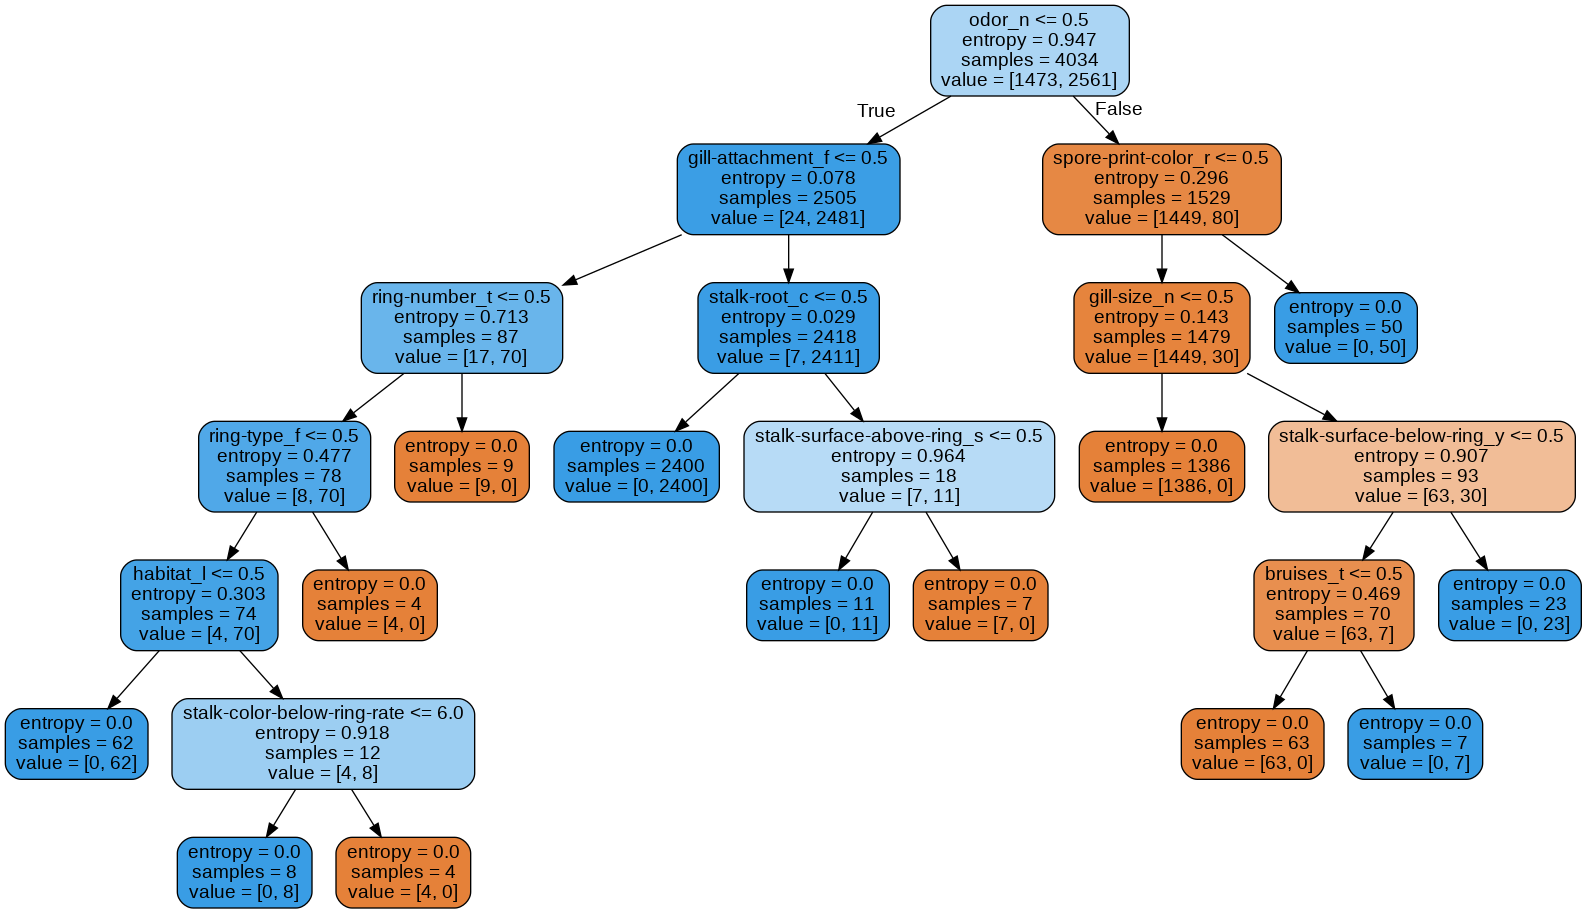

In [185]:
dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,feature_names=X_train_new.columns,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())